#### Problem Statement

**Boom Bikes**: A US based bike sharing company has a large fleet of bikes. They have a large number of stations where they have a large number of bikes. Due to recent pandemic, Boom Bikes has lost his business and is looking for a way to overcome the loss, once the pandemic ends.

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


#### Goal:
* Develop a machine learning model which can describe the features which are important in predicting the demand for shared bikes.
* The model will then be used by marketing team of Boom Bikes to understand the demand for shared bikes.

### Importing all the necessary libraries

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



### Importing the Dataset and exploring

In [6]:
bike_df=pd.read_csv('./day.csv')

In [7]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike_df.shape

(730, 16)

In [10]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

Checking for nulls in each column

In [11]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Removing unnecessary columns which do not contribute to the analysis and model building

1. instant: this column is just and index and has unique values for each row, and hence does not contribute to any analysis or model building.
2. dteday: this column is the date of the data and has no significance in the analysis or model building.
3. casual: this column is the number of casual riders, who havent registered as a user, and has no significance in the analysis or model building. 
4. registered: this column is the number of registered riders and has no significance in the analysis or model building.

**Note**: Casual + Registered = Count(Target Variable)

In [12]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
#columns reduced to 12 from 16
bike_df.shape[1]

12

#### Outlier Treatment 

From the analysis the following are continous features

- temp: Temperature
- atemp: Average temperature 
- hum: Humidity 
- windspeed: Wind speed 

In [14]:
numerical_vars=['temp', 'windspeed', 'hum', 'atemp']

In [15]:
bike_df[numerical_vars].describe()
#the difference between mean and median is very small for all numerical variables

,temp,windspeed,hum,atemp
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,12.763620,62.765175,23.726322
std,7.506729,5.195841,14.237589,8.150308
min,2.424346,1.500244,0.000000,3.953480
25%,13.811885,9.041650,52.000000,16.889713
50%,20.465826,12.125325,62.625000,24.368225
75%,26.880615,15.625589,72.989575,30.445775
max,35.328347,34.000021,97.250000,42.044800


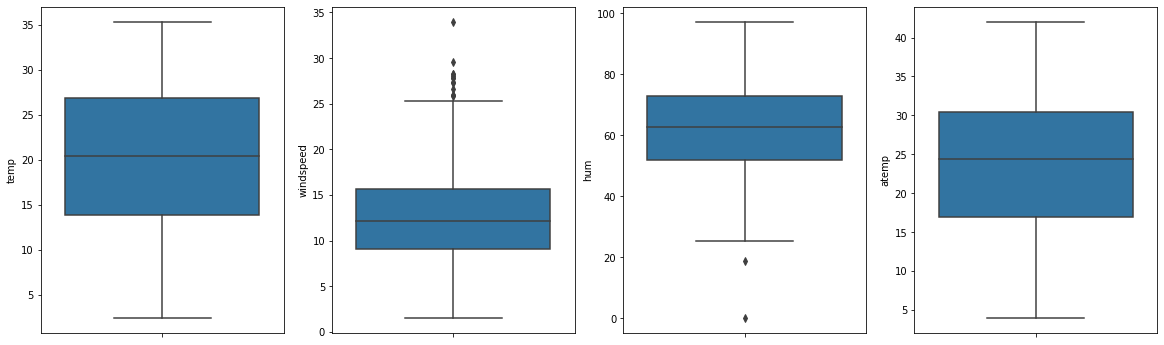

In [16]:


plt.figure(figsize=(20,6))
for index, column in enumerate(numerical_vars): 
    plt.subplot(1,4,index+1)
    sns.boxplot(y=column, data=bike_df)

No outliers for  variables of the data set, so we can move ahead and perform EDAaa

### EDA (Exploratory Data Analysis)

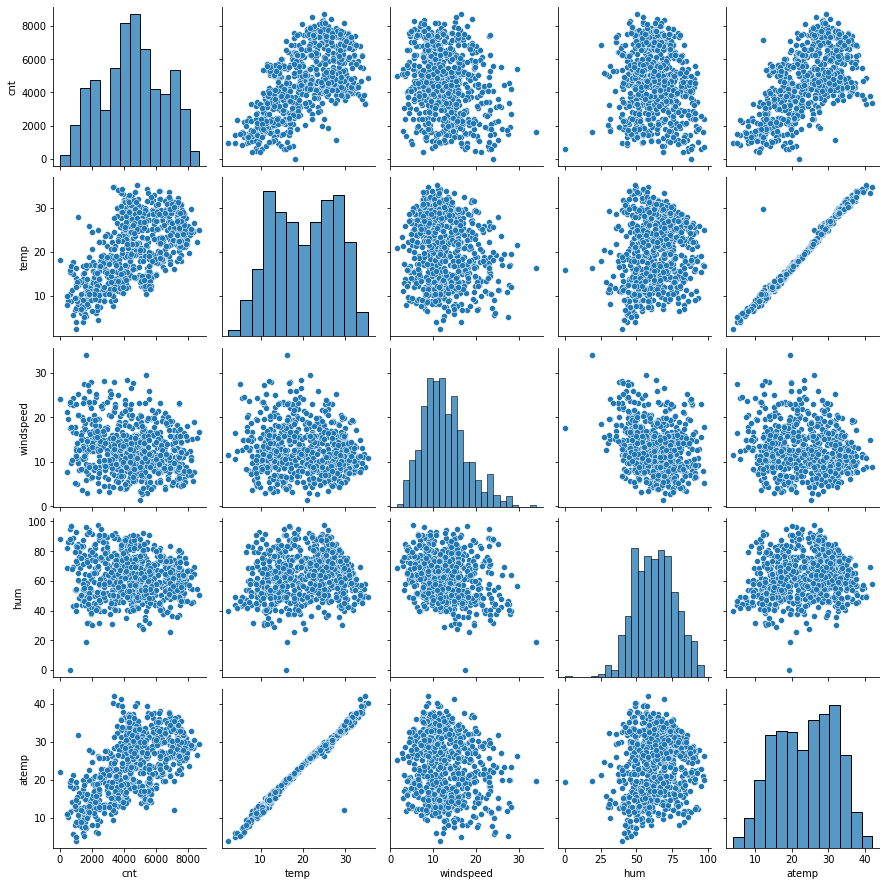

In [17]:
numerical_vars.insert(0,'cnt')
sns.pairplot(data=bike_df,vars=numerical_vars)


In [18]:
bike_df[numerical_vars].corr()

,cnt,temp,windspeed,hum,atemp
cnt,1.000000,0.627044,-0.235132,-0.098543,0.630685
temp,0.627044,1.000000,-0.158186,0.128565,0.991696
windspeed,-0.235132,-0.158186,1.000000,-0.248506,-0.183876
hum,-0.098543,0.128565,-0.248506,1.000000,0.141512
atemp,0.630685,0.991696,-0.183876,0.141512,1.000000


<AxesSubplot:>

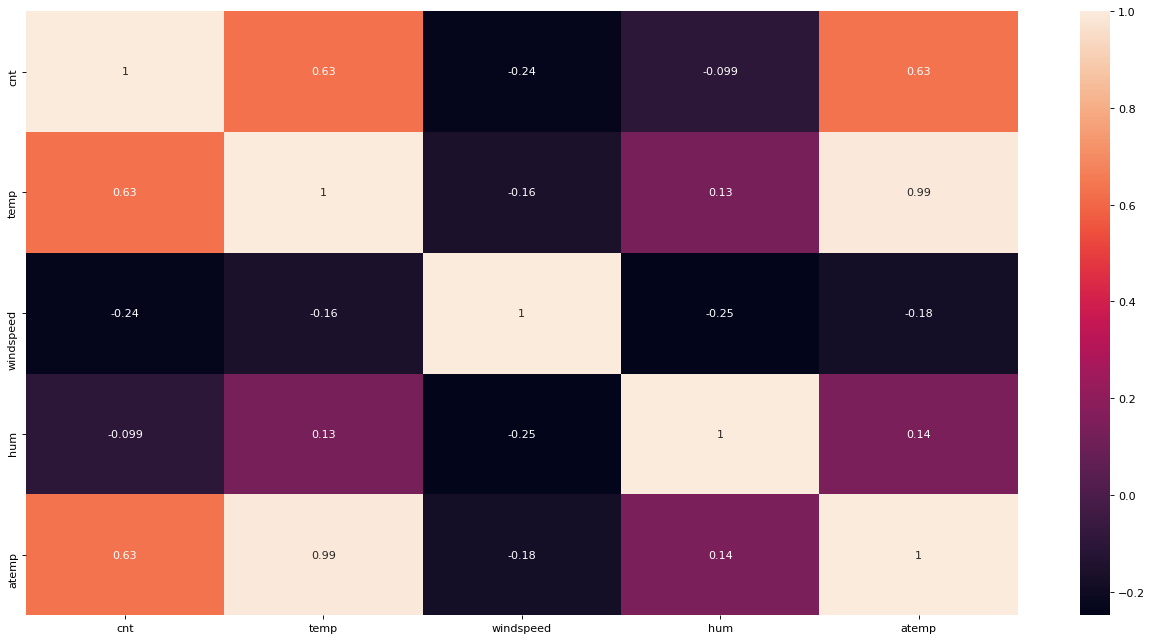

In [19]:
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(bike_df[numerical_vars].corr(), annot=True)

Analysis from the heatmaps/ Correlation Matrix / Pairplot:

1. atemp and temp show a high correlation 0.99 which is close to 1.
2. temp and atemp also show a high correlation with target variable cnt

As can be seen from the pairplot, features temp, atemp show high linear relationship with the target variable cnt.
It is always a better choice to drop highly correlated features.

Let's see the correlation again with a regression line this time

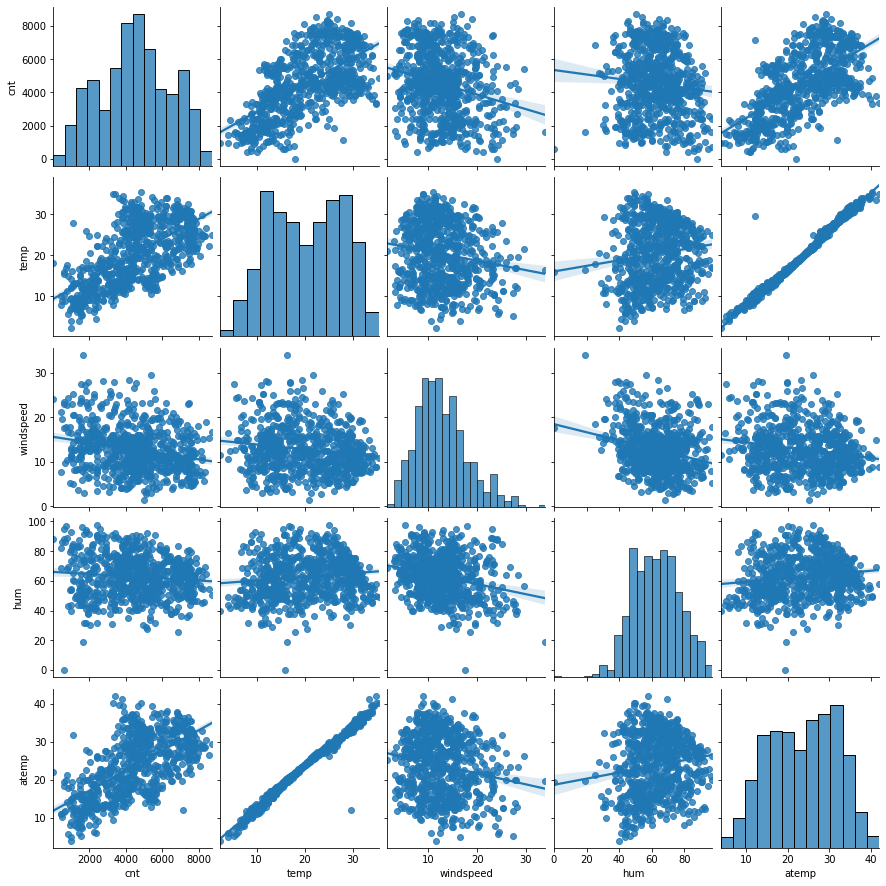

In [20]:
sns.pairplot(data=bike_df,vars=numerical_vars, kind="reg")

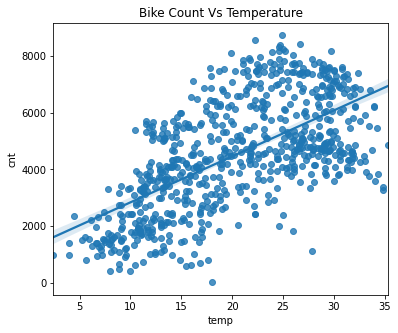

In [21]:
plt.figure(figsize=(6,5))
plt.title("Bike Count Vs Temperature")
sns.regplot(data=bike_df,y="cnt", x="temp")
plt.show()

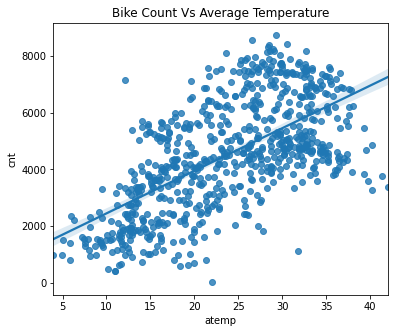

In [22]:
plt.figure(figsize=(6,5))
plt.title("Bike Count Vs Average Temperature")
sns.regplot(data=bike_df,y="cnt", x="atemp")
plt.show()

`Analysis:`
- As the temperature increases the users tend to rent out bikes more

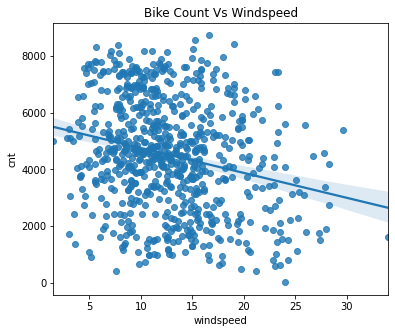

In [23]:
plt.figure(figsize=(6,5))
plt.title("Bike Count Vs Windspeed")
sns.regplot(data=bike_df,y="cnt", x="windspeed")
plt.show()

`Analysis:`
- As the windspeed increases the users prefer stayin at home or prefer travelling using safer transport

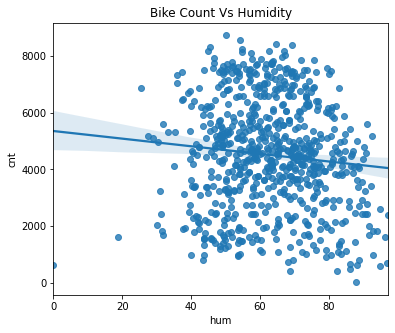

In [24]:
plt.figure(figsize=(6,5))
plt.title("Bike Count Vs Humidity")
sns.regplot(data=bike_df,y="cnt", x="hum")
plt.show()

`Analysis:` 
1. Values are more scattered around
2. As the humidity increases the users tend to rent out bikes more

Let's analyze the `categorical features` in the data set
- ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [25]:
def binaryCategorical(str, bb):
    if len(bb[str].value_counts()) <=2:
        return "Binary" 
    else:
        return "Multinomial"


cat_vars= ['season', 'holiday', 'workingday', 'weathersit', 'mnth', 'weekday','yr']

l=[binaryCategorical(i,bike_df) for i in cat_vars]
print(l)

['Multinomial', 'Binary', 'Binary', 'Multinomial', 'Multinomial', 'Multinomial', 'Binary']


There are total 7 features which have been encoded into simple numerical numbers and they are as follows:

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- Clear, Few clouds, Partly cloudy, Partly cloudy
	- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<br>We can classify the weathersit variable into 4 simple categories:
<br>1. Clear
<br>2. Few clouds
<br>3. Partly cloudy
<br>4. Cloudy

Let's convert these variables with relevant types

In [26]:
bike_df['season']=bike_df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

bike_df['weekday']=bike_df.weekday.map({0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'})

bike_df['weathersit']=bike_df.weathersit.map({1:'clear',2:'mist',3:'light rain',4:'heavy rain'})
bike_df['mnth']=bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})



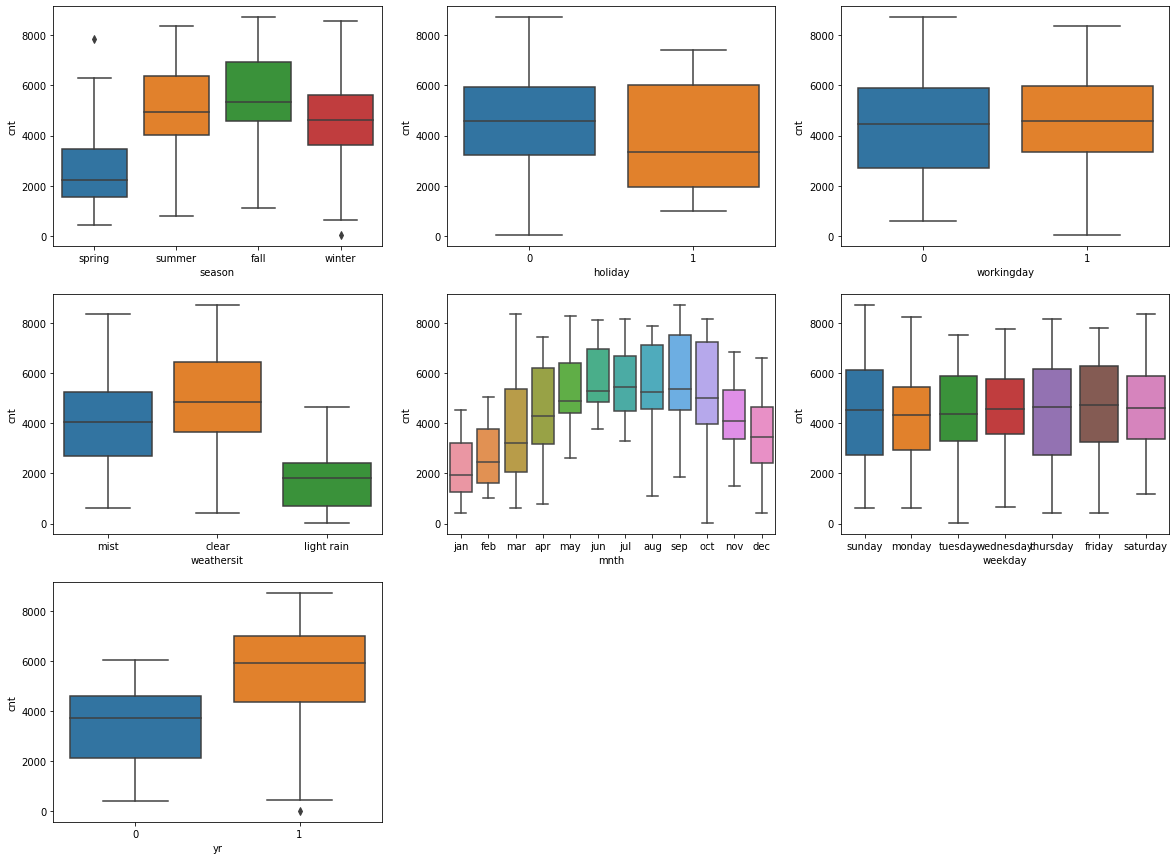

In [27]:
continous_vars=['season', 'holiday', 'workingday', 'weathersit', 'mnth', 'weekday','yr']
#box blot against count for analysis
plt.figure(figsize=(20,15))
for index, column in enumerate(continous_vars): 
    plt.subplot(3,3,index+1)
    sns.boxplot(y="cnt",x=column, data=bike_df)

`Insights from above boxplots`:
- The average number of users are high in fall season, and low in spring followed by winter and summer.
- Bikes have been rented more in the year 2019
- Average number of users rented bike in the month of July are high
- On a non holiday users tend to stay at home and hence the sales are low on non holiday days
- Average number of users is almost same for all the days of a week
- Average number of users is almost same irrespective of the day being a working day / non working day
- During a heavy rainy day, no user preferred to rent a bike, however most number of users preferred renting a bike when the weather was clear

### Preparing Data for Linear Regression Model Building

#### 1. Creating dummies for categorical variables

Though there are 7 categorical variables, of which holiday, workinday and yr are already in binary form, we do not need to create dummies for these variables, and can be used as is.



In [28]:
bike_df=pd.get_dummies(bike_df, columns=['season','mnth','weekday'], drop_first=True)

In [29]:
bike_df=pd.get_dummies(bike_df, columns=['weathersit'])

In [30]:
bike_df.columns.nunique()

31

### Model Preparation and Building 

#### 1. Splitting the data into training and test sets

In [31]:
bike_train, bike_test= train_test_split(bike_df, test_size=0.3, random_state=100)

In [32]:
Y_Bike_Train=bike_train.pop('cnt')
X_Bike_Train= bike_train
Y_Bike_Test=bike_test.pop('cnt')
X_Bike_Test= bike_test

In [33]:
print(Y_Bike_Train.shape)
print(X_Bike_Train.shape)
print(Y_Bike_Test.shape)
print(X_Bike_Test.shape)

(511,)
(511, 30)
(219,)
(219, 30)


#### 2. Feature Scaling for Continuous Variables

In [34]:
scaler= MinMaxScaler()
numerical_vars=['temp','hum','windspeed','atemp']
#Scaling Numerical variables using MinMaxScaler for test and train dataset

X_Bike_Train[numerical_vars]=scaler.fit_transform(X_Bike_Train[numerical_vars])
X_Bike_Test[numerical_vars]=scaler.transform(X_Bike_Test[numerical_vars])

In [35]:
X_Bike_Train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_light rain,weathersit_mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.142857,0.127202,0.154599,0.158513,0.150685,0.133072,0.626223,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.350270,0.333525,0.361876,0.365579,0.358092,0.339986,0.484280,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

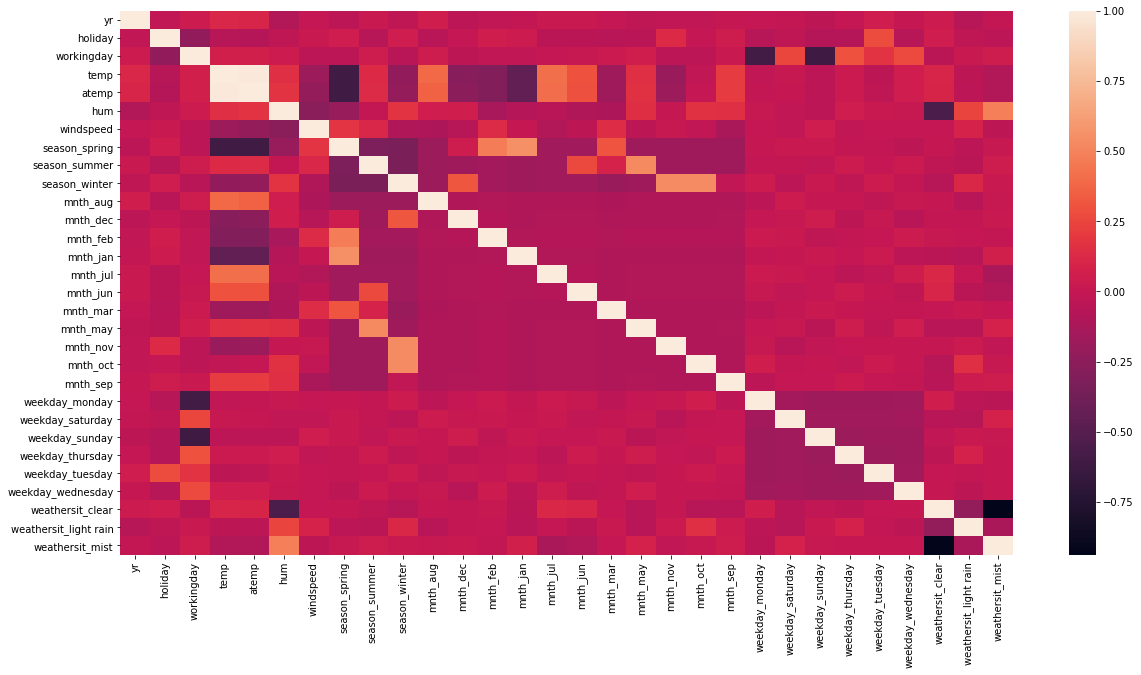

In [36]:
plt.figure(figsize=(20,10))
#HeatMap to show the correalation between variables
sns.heatmap(X_Bike_Train.corr())

In [37]:
X_Bike_Train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_light rain,weathersit_mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.142857,0.127202,0.154599,0.158513,0.150685,0.133072,0.626223,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.350270,0.333525,0.361876,0.365579,0.358092,0.339986,0.484280,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Baseline Model Accuracy

In [38]:
lr=LinearRegression()
lr.fit(X_Bike_Train,Y_Bike_Train)
    

LinearRegression()

### Feature Elimination using RFE (Recursive Feature Elimination)

In [39]:
X_Bike_Train.shape[1]

30

In [40]:
rfe = RFE(lr,15)
rfe.fit(X_Bike_Train,Y_Bike_Train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [41]:
list(zip(X_Bike_Train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_monday', False, 9),
 ('weekday_saturday', False, 16),
 ('weekday_sunday', True, 1),
 ('weekday_thursday', False, 13),
 ('weekday_tuesday', False, 10),
 ('weekday_wednesday', False, 15),
 ('weathersit_clear', True, 1),
 ('weathersit_light rain', True, 1),
 ('weathersit_mist', True, 1)]

In [42]:
removed_columns_by_rfe=X_Bike_Train.columns[rfe.support_==False]

In [43]:
removed_columns_by_rfe

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_monday',
       'weekday_saturday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

Using Backward Feature Selection Approach to select the features which have the highest collinearity with other independent variables and dropping them

In [44]:
selected_cols=X_Bike_Train.columns[rfe.support_]

Helper function to build the model

In [45]:
def build_model(columns):
    X_Bike_Train_sm=sm.add_constant(X_Bike_Train[columns])
    lr=sm.OLS(Y_Bike_Train,X_Bike_Train_sm).fit()
    print(lr.summary())
    return lr

Helper function to show HeatMap

In [46]:
def showHeatMap(columns):
    plt.figure(figsize=(20,10))
    sns.heatmap(X_Bike_Train[columns].corr(), annot=True)

Helper Function to calculate VIF

In [47]:
def calculate_vif(columns):
    vif=pd.DataFrame()
    df=X_Bike_Train[columns]
    vif["features"]=df.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    print(vif)


In [48]:

def printR2Score(y, y_pred):
    print("R2 Score: ", r2_score(y, y_pred))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.31e-192
Time:                        22:48:36   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   922.59

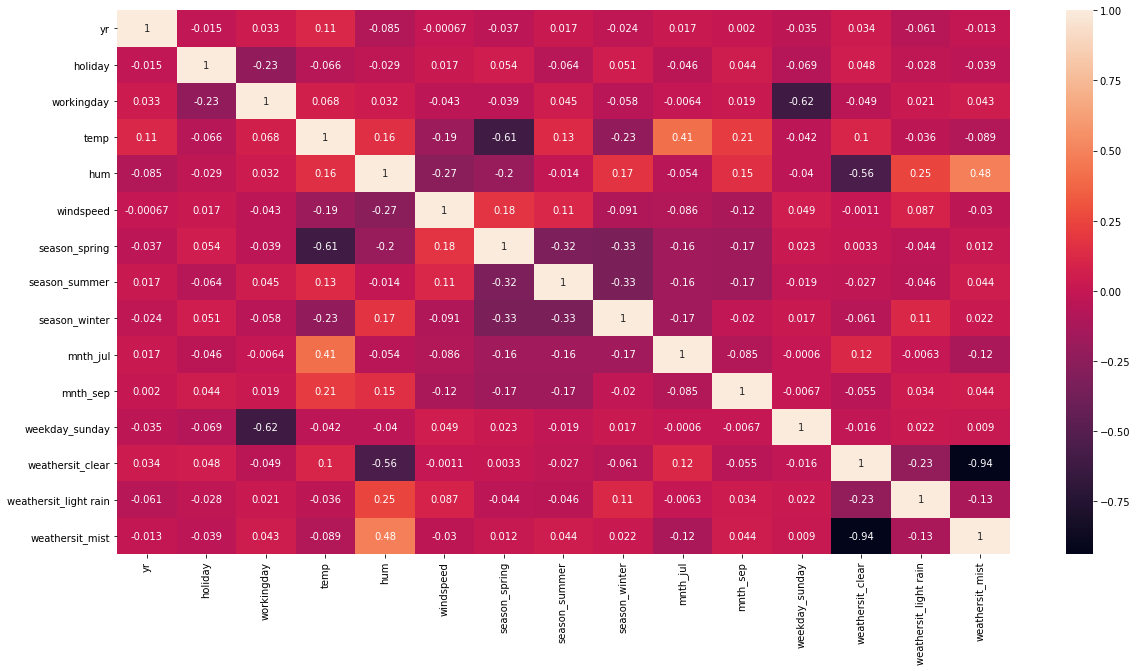

In [49]:
build_model (selected_cols)
calculate_vif (selected_cols)
showHeatMap( selected_cols)

From the heatmap we can derive to a conclusion that Humidity is collinear with weathersit_mist

In [50]:
selected_cols=selected_cols.drop( "hum")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.84e-189
Time:                        22:48:38   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   227.03

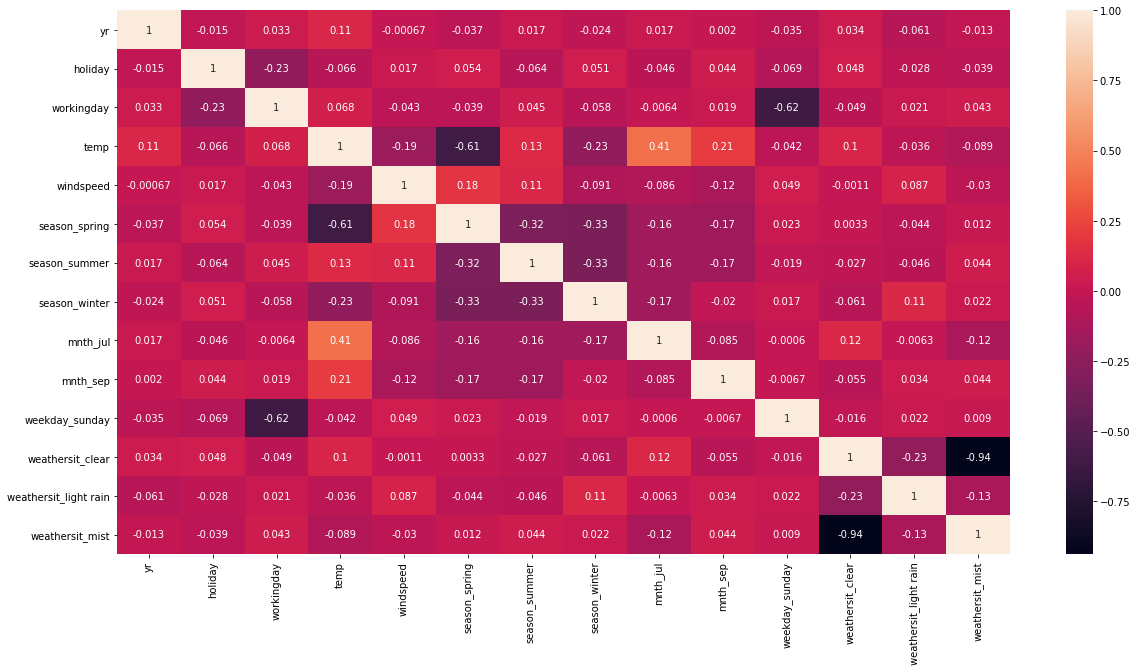

In [51]:
build_model (selected_cols)
calculate_vif (selected_cols)
showHeatMap( selected_cols)

temp is highly correlated with the feature mnth_jul, so lets remove mnth_july

weathersit_clear is having the highest VIF value, so we can drop it.

In [52]:
selected_cols=selected_cols.drop( "weathersit_clear")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.84e-189
Time:                        22:48:40   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1382.98

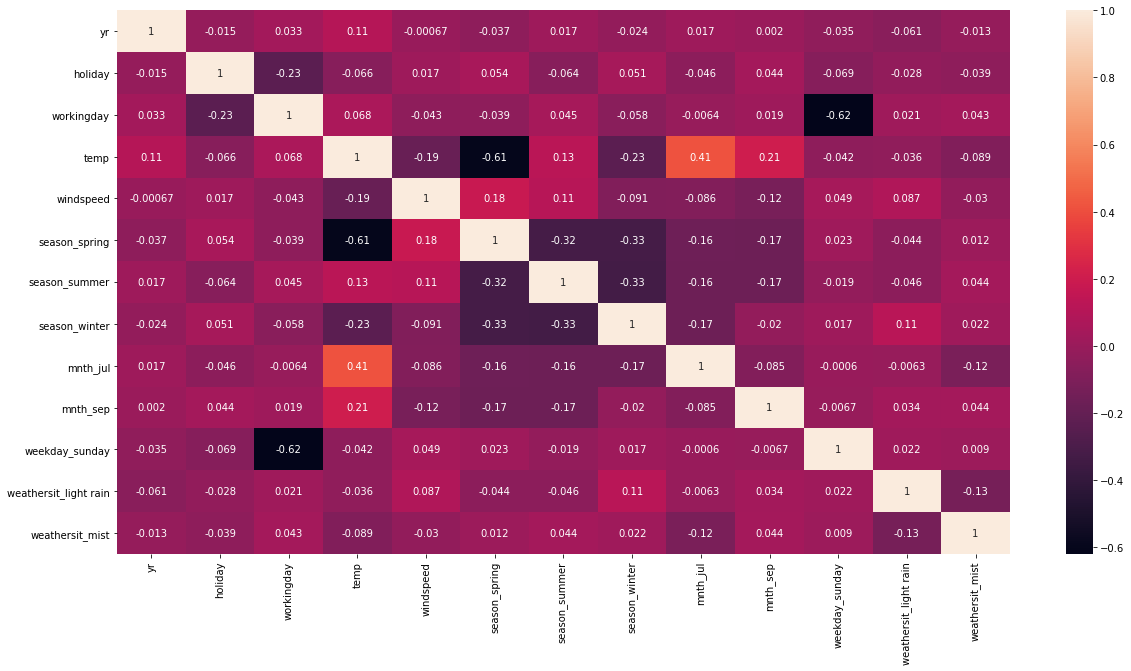

In [53]:
build_model (selected_cols)
calculate_vif (selected_cols)
showHeatMap( selected_cols)

Let's remove season_summer as temperature would be really be high in summer season.

In [54]:
selected_cols=selected_cols.drop( "season_summer")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.75e-188
Time:                        22:48:43   Log-Likelihood:                -4131.5
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     498   BIC:                             8344.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1866.88

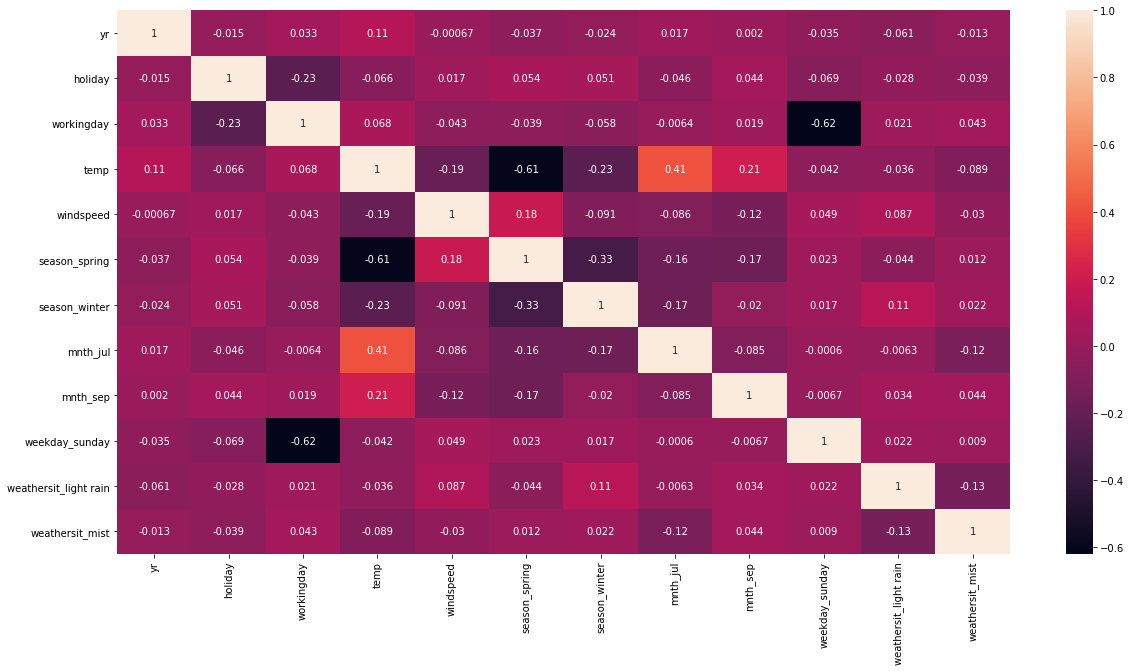

In [55]:
build_model (selected_cols)
calculate_vif (selected_cols)
showHeatMap( selected_cols)

In [56]:
selected_cols= selected_cols.drop ("workingday")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     226.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.13e-186
Time:                        22:48:46   Log-Likelihood:                -4139.1
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     499   BIC:                             8353.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2191.30

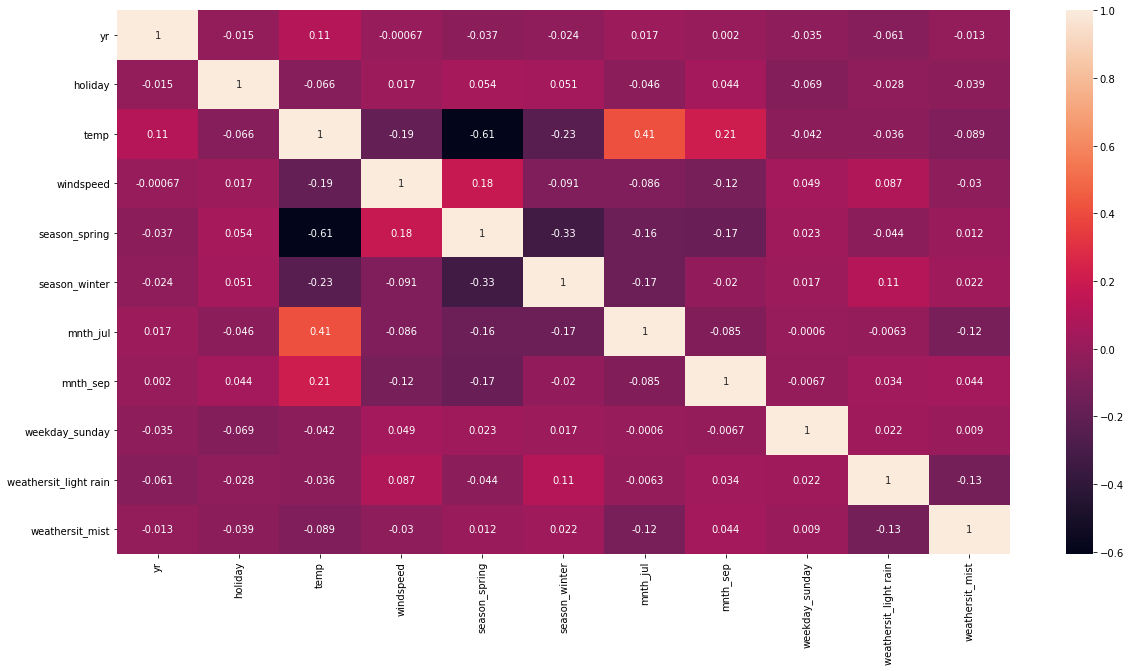

In [57]:
build_model (selected_cols)
calculate_vif (selected_cols)
showHeatMap( selected_cols)

In [58]:
selected_cols=selected_cols.drop( "weekday_sunday")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.28e-186
Time:                        22:48:50   Log-Likelihood:                -4140.5
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     500   BIC:                             8350.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2217.34

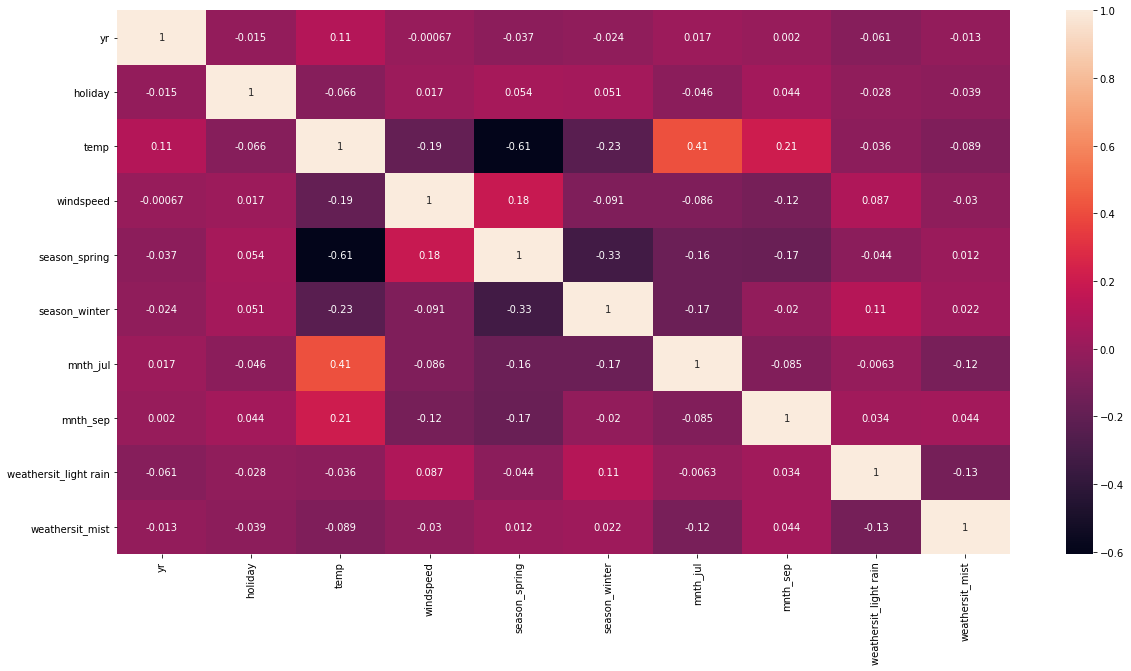

In [59]:
build_model (selected_cols)
calculate_vif (selected_cols)
showHeatMap( selected_cols)

### `Inferences`

1. P-value for almost all feature is less than 0.05, means that we can reject the null hypothesis and conclude that the feature is significant.
2. R2 is 0.832, which is a good model, also the Adjusted R2 is 0.829 and the difference between this is very less, we can say that no more features shall be removed.
3. Prob(F-Stastic) is very low, we can go ahead accept this model

Now that we have final model with us with necessary features, we can go ahead and build our final model, and this would be our training model.

In [60]:
X_Bike_Train_sm=sm.add_constant(X_Bike_Train[selected_cols]) 
lr= sm.OLS( Y_Bike_Train,X_Bike_Train_sm).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.28e-186
Time:                        22:48:55   Log-Likelihood:                -4140.5
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     500   BIC:                             8350.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2217.3479    208.442     10.638      0.000    1807.819    2626.877
yr                     2040.7285     72.212     28.260      0.000    1898.853    2182.604
holiday                -856.2986    228.908     -3.741      0.000   -1306.038    -406.559
temp                   3915.6576    266.560     14.690      0.000    3391.942    4439.373
windspeed             -1211.6310    219.194     -5.528      0.000   -1642.285    -780.977
season_spring          -973.7755    132.788     -7.333      0.000   -1234.667    -712.884
season_winter           401.9132    108.211      3.714      0.000     189.309     614.517
mnth_jul               -636.3103    152.336     -4.177      0.000    -935.609    -337.012
mnth_sep                495.7939    138.326      3.584      0.000     224.022     767.566
weathersit_light rain -2487.3685    217.062    -11.459      0.000   -2913.835   -2060.902
weathersit_mist        -696.4152     76.865     -9.060      0.000    -847.434    -545.396
==============================================================================
Omnibus:                       57.757   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.435
Skew:                          -0.600   Prob(JB):                     2.36e-30
Kurtosis:                       5.229   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## `Model Evaluation`

### 1. Residual Analysis (Error State)

In [61]:
Y_Bike_Train_pred=lr.predict(X_Bike_Train_sm)

<AxesSubplot:ylabel='Density'>

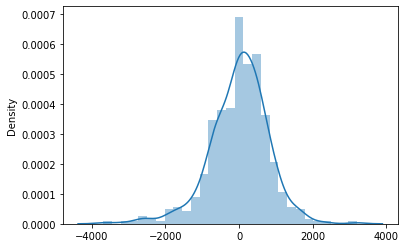

In [62]:
res= Y_Bike_Train- Y_Bike_Train_pred
sns.distplot(res)

let's calculate the r2 score

In [63]:
printR2Score(Y_Bike_Train,Y_Bike_Train_pred)

R2 Score:  0.8322005053227793


The r2 score is the coefficient of determination, or R-squared, which is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). 

the r2 score is a good measure of how well the model fits the data.
The R2 score that has been calculated for train data was 0.832 and the r2 score which has been calculated for predicted data is also approximately 0.832 (0.8297). Which proves that the predicted for all the values is very close to the actual values, and hence can be tested on the test set.


`Following Assumptions are satisfied`:
1. The error state is normally distributed
2. The error state is independent of the independent variables
3. The error state is not correlated with the independent variables/ Error should be independent
4. Homoscedasticity is satisfied
5. No Multicollinearity
6. Linearity is there among Target Variable and Independent Variables


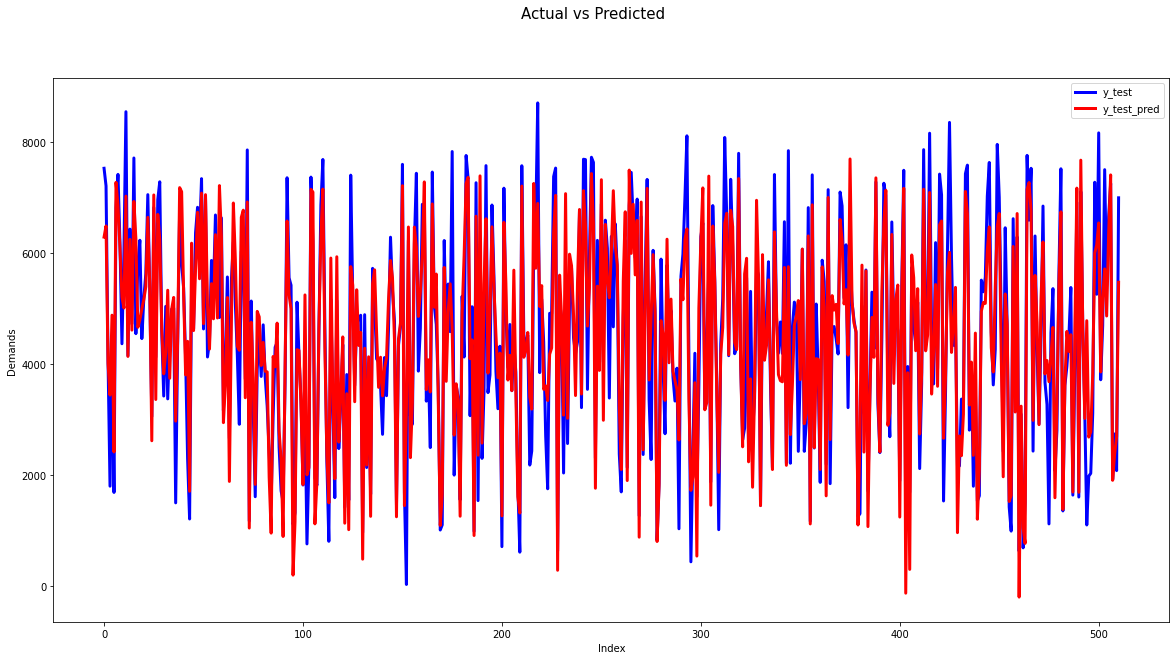

In [64]:
plt.figure(figsize=(20,10))
xtrain = [i for i in range(0,len(X_Bike_Train_sm),1)]

plt.plot(xtrain,Y_Bike_Train, color="blue", label="y_test", linewidth=3)
plt.plot(xtrain,Y_Bike_Train_pred, color="red", label="y_test_pred", linewidth=3)
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend()
plt.show()

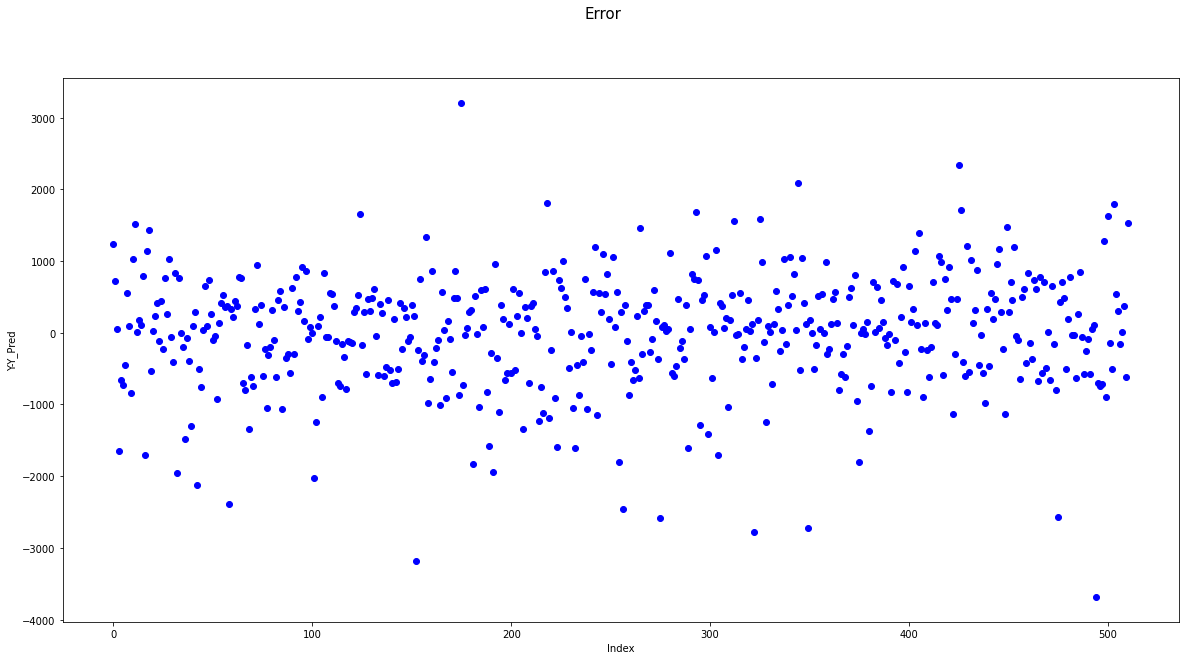

In [65]:
plt.figure(figsize=(20,10))
xerror=[ i for i in range(0, len(X_Bike_Train_sm),1)]
plt.plot(xerror,res, color="blue", marker="o", linewidth=0)
plt.suptitle('Error', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Y-Y_Pred')
plt.show()

`Inference`:
Error terms are randomly distributed for Train Data set

### Predicting Values for Test Data Set

In [66]:
X_Bike_Test_sm=sm.add_constant(X_Bike_Test[selected_cols]) 

In [67]:
Y_Bike_Test_pred=lr.predict(X_Bike_Test_sm)

<AxesSubplot:ylabel='Density'>

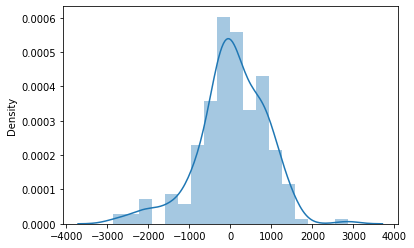

In [68]:
res= Y_Bike_Test- Y_Bike_Test_pred
sns.distplot(res)

`Inferences`:
1. The error state for Test is also normally distributed with mean 0

In [69]:
printR2Score(Y_Bike_Test,Y_Bike_Test_pred)

R2 Score:  0.80737342922266


The r2_score for test data set is .8045 which is close to r2_score for train dataset 0.832

Text(0, 0.5, 'y_test_pred')

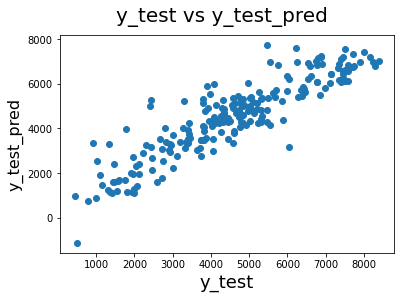

In [70]:
fig = plt.figure()
plt.scatter(Y_Bike_Test, Y_Bike_Test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

R2 score value for test predictions is equal to R2 score value for test data set, since these two have equal r2_score, the relationship between the two is linear and can be checked via a lineplot.

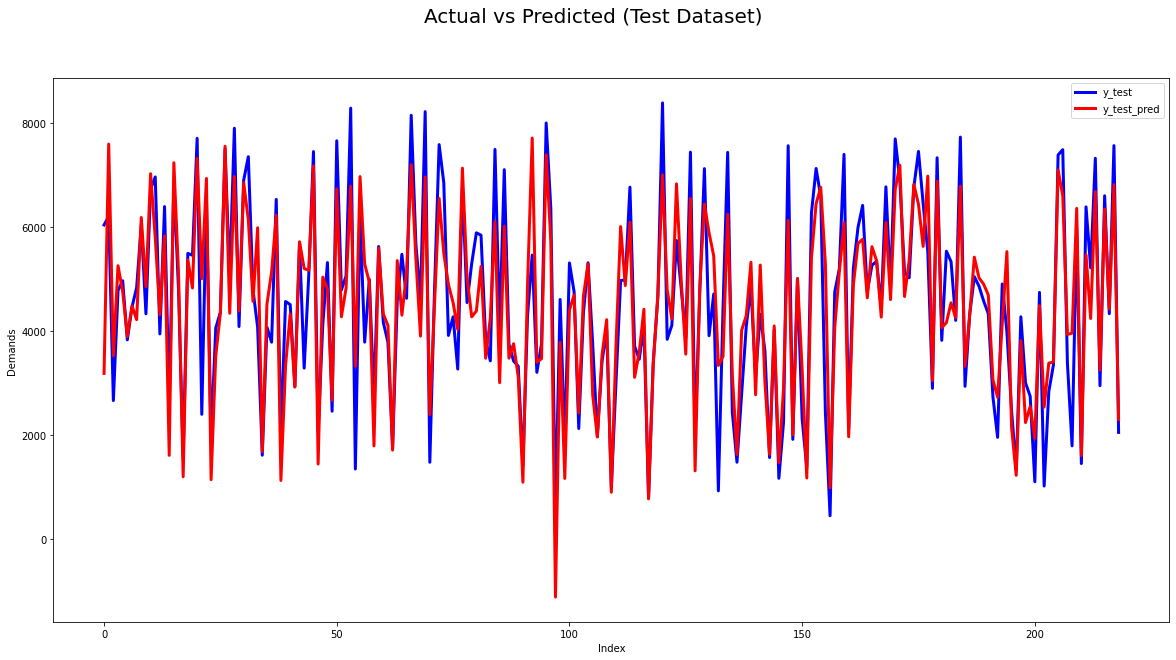

In [71]:
plt.figure(figsize=(20,10))
xtest = [i for i in range(0,len(X_Bike_Test_sm),1)]
plt.plot(xtest,Y_Bike_Test, color="blue", label="y_test", linewidth=3)
plt.plot(xtest,Y_Bike_Test_pred, color="red", label="y_test_pred", linewidth=3)
plt.suptitle('Actual vs Predicted (Test Dataset)', fontsize = 20)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend()
plt.show()

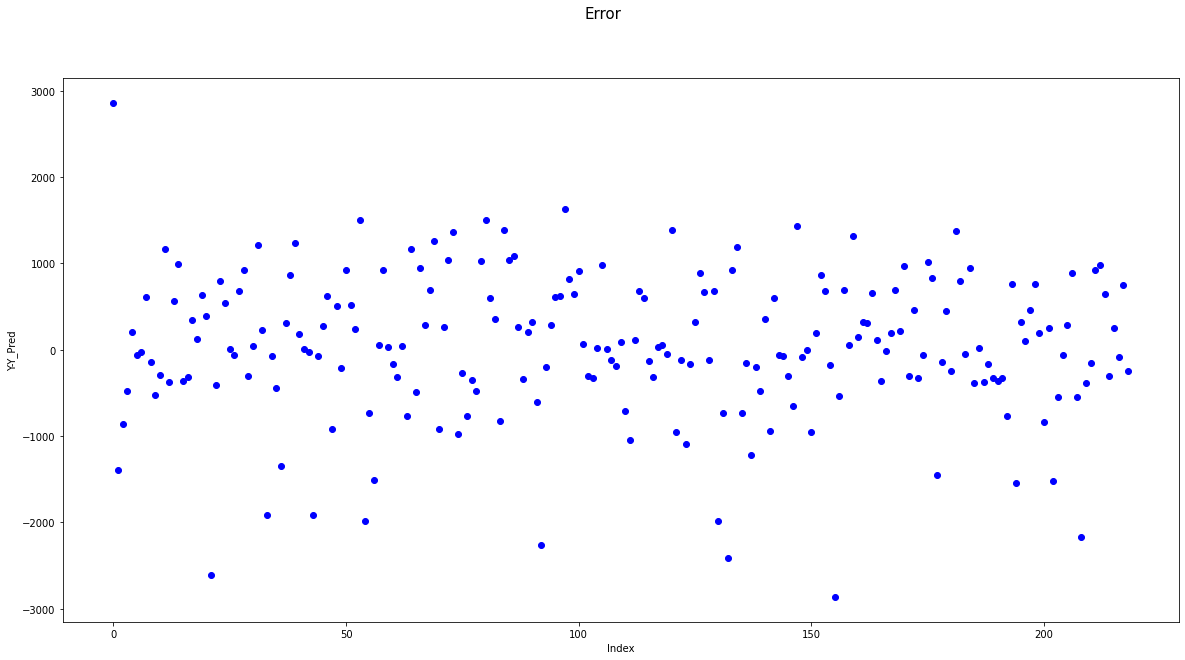

In [72]:
plt.figure(figsize=(20,10))
xerror=[ i for i in range(0, len(X_Bike_Test_sm),1)]
plt.plot(xerror,res, color="blue", marker="o", linewidth=0)
plt.suptitle('Error', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Y-Y_Pred')
plt.show()

`Inferences`:
1. The error terms are randomly distributed and show no visible trend/pattern.

This is because the error terms are independent of the independent variables.
We have proved all our assumptions, this means the model is good to go with

In [73]:
printR2Score(Y_Bike_Test,Y_Bike_Test_pred)
printR2Score(Y_Bike_Train, Y_Bike_Train_pred)

R2 Score:  0.80737342922266
R2 Score:  0.8322005053227793


In [81]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()
lm.fit(X_Bike_Train_sm, Y_Bike_Train)
print(lm.coef_)
print(selected_cols)

[    0.          2040.72847196  -856.29858031  3915.65758326
 -1211.63100134  -973.77547055   401.91317084  -636.31034709
   495.79386407 -2487.36851193  -696.41515034]
Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_jul', 'mnth_sep', 'weathersit_light rain', 'weathersit_mist'],
      dtype='object')


# `Conclusion`:

In [74]:
build_model(selected_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.28e-186
Time:                        22:49:11   Log-Likelihood:                -4140.5
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     500   BIC:                             8350.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2217.34

Based on the above summary, we can conclude that the model is good to go with, however the company management has to take about few things so that they could make some profits post covid-19.

Interpretation based on the model output:
1. As we can see see there is a negative linear relation between spring season and bike count, meaning the marketing team has to expand there business during spring season
2. If windspeed is high it is risky for people to go out and rent out a bike and hence the bike count is low.
3. Marketing team should concentrate in the month of July, as the number of users in July are low
4. During rainy season, people prefer cabs over bikes, probably marketing team should focus on providing a gadget which could preotect people during rainy season
5. During holiday people prefer to stay at home, so the bike count is low, however if Boom bikes campaigns that some amount during holdays whould be donated to charities, then users will come forward and use Boom Bikes during holidays too.

